In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
# 1. Load data
# 2. Read documentation at https://archive.ics.uci.edu/ml/datasets/Computer+Hardware
'''
1. vendor name: 30
(adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec,
dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson,
microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry,
sratus, wang)
2. Model Name: many unique symbols
3. MYCT: machine cycle time in nanoseconds (integer)
4. MMIN: minimum main memory in kilobytes (integer)
5. MMAX: maximum main memory in kilobytes (integer)
6. CACH: cache memory in kilobytes (integer)
7. CHMIN: minimum channels in units (integer)
8. CHMAX: maximum channels in units (integer)
9. PRP: published relative performance (integer)
10. ERP: estimated relative performance from the original article (integer)
'''
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vendor  209 non-null    object
 1   model   209 non-null    object
 2   myct    209 non-null    int64 
 3   mmin    209 non-null    int64 
 4   mmax    209 non-null    int64 
 5   cach    209 non-null    int64 
 6   chmin   209 non-null    int64 
 7   chmax   209 non-null    int64 
 8   prp     209 non-null    int64 
 9   erp     209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


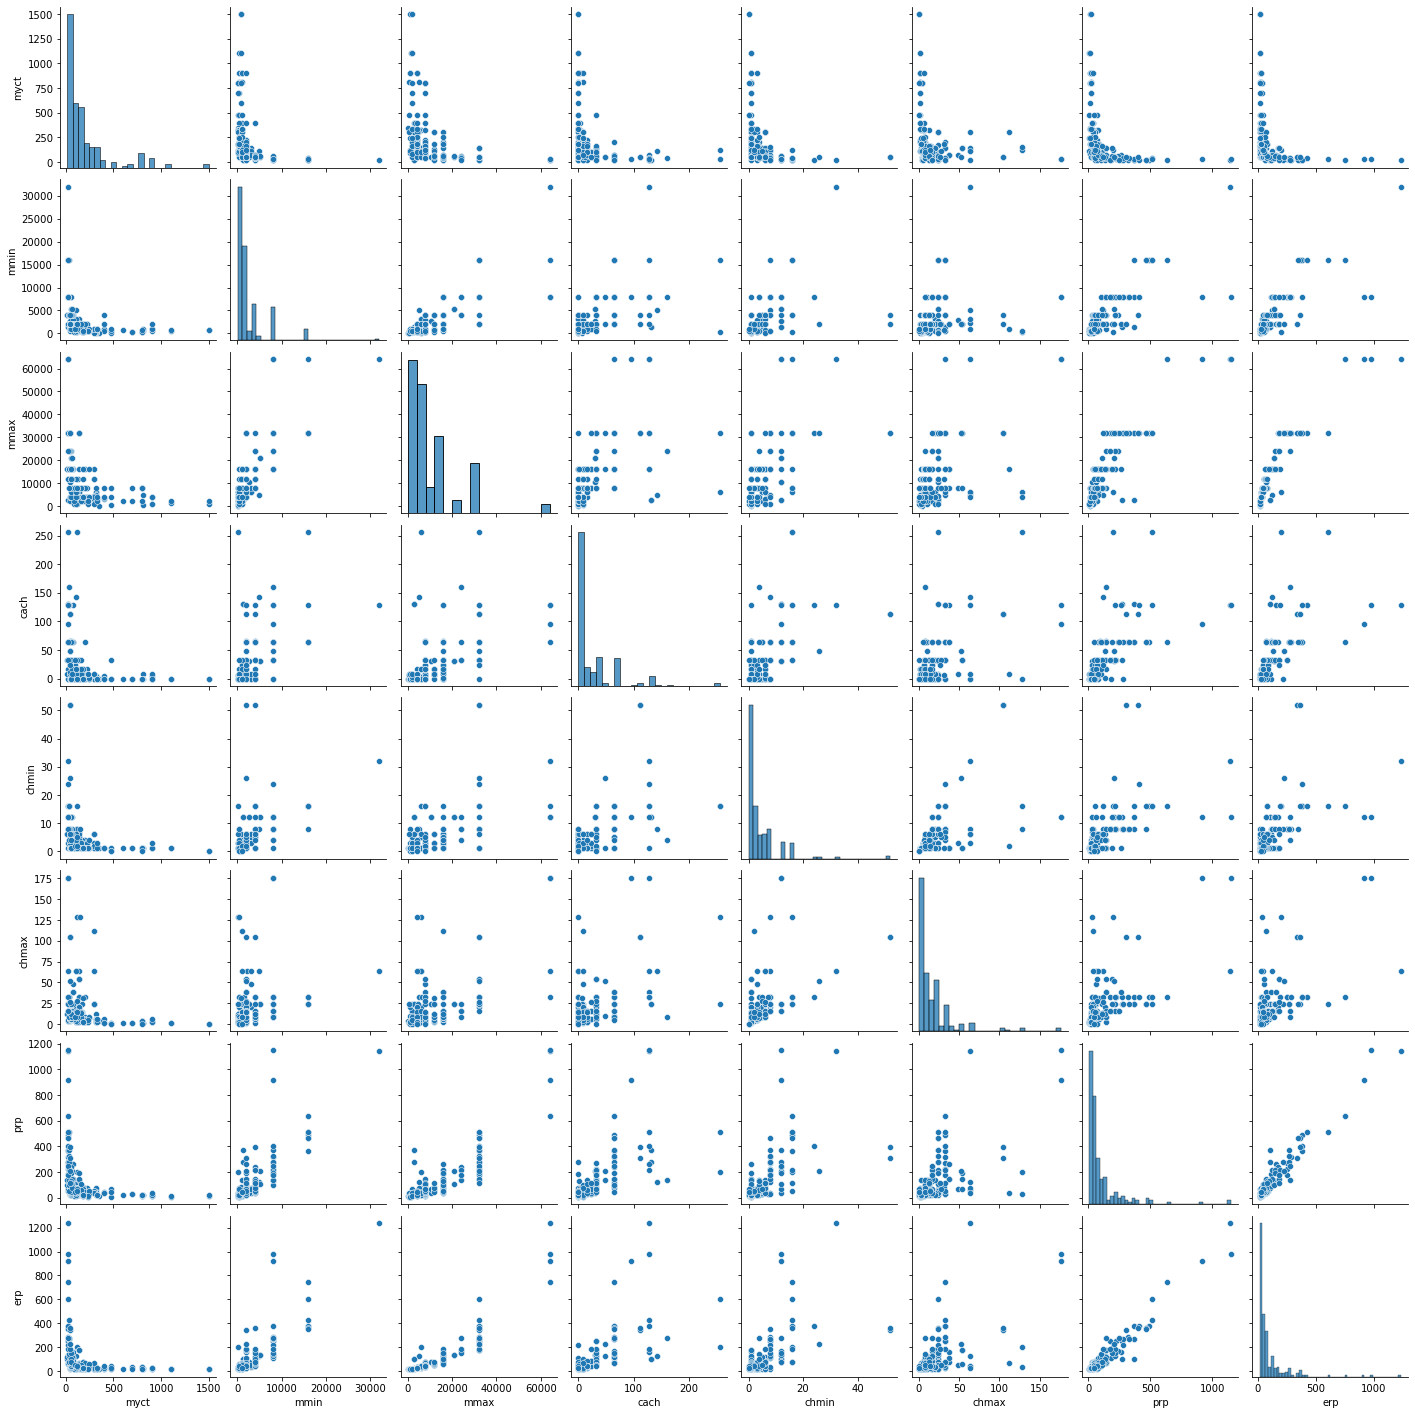

In [6]:
# 3. Create a matrix of scatter plots using the Seaborn pairplot function.  Do some features appear to be strongly correlated?
sns.pairplot(df)

<AxesSubplot:xlabel='mmax', ylabel='prp'>

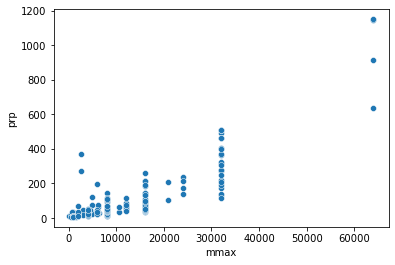

In [15]:
# 4. Pick a feature (like ‘mmin’, ‘mmax’, ‘cach’, etc.) and produce a scatterplot with that feature on the x axis and ‘prp’ on the y axis.  Does prp seem to change linearly with respect to the feature you chose?  Describe the pattern: what is the trend, how focused is the pattern, are there outliers, etc.?

# sns.scatterplot(x='mmin', y='prp', data=df)
sns.scatterplot(x='mmax', y='prp', data=df)
# sns.scatterplot(x='cach', y='prp', data=df)

'''
PRP does tend to have a linear trend when compared to mmax. There are a few outliers at that are located far to the right from most of the dataset around where mmax > 60_000.
'''

In [20]:
# 5. Fit a linear model to the data using sklearn.linear_model.LinearRegression.  The model should have ‘prp’ as its target variable, and the feature you chose as its single predictor variable.  Assign the model to variable ‘fit’.
x = df[['mmax']].values # expects a 2D array, so double wrap
y = df['prp'].values # expects a 1D array
regr = LinearRegression()
regr.fit(x,y)
print(f'w0: {regr.intercept_:.2f}, w1: {regr.coef_[0]:.2f}')

w0: -34.00, w1: 0.01


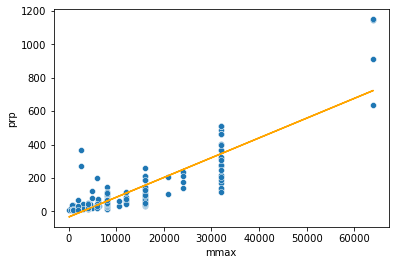

In [33]:
# 6. Plot the predicted relationship on top of your plot of problem 4 above.  Compare your plot to the one you would get with Seaborn's regplot (which will find and plot the regression line for you).

sns.scatterplot(x='mmax', y='prp', data=df)
plt.plot(x, regr.predict(x), color='orange')

'\nIf my predictons where great, then this plot should look to the original graph, or at least more linear.\n'

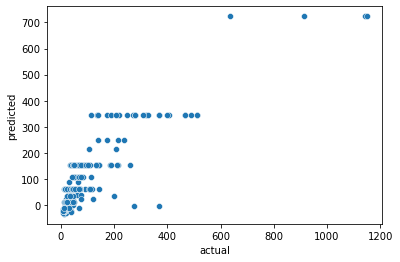

In [41]:
# 7. Create a scatterplot with the actual 'prp' value on the X axis and the predicted 'prp' value on the Y axis.   If your predictions were great, what would this plot look like?
actual = df['prp']
predicted = regr.predict(x)
sns.scatterplot(x=actual, y=predicted)
plt.xlabel("actual")
plt.ylabel("predicted")
'''
If my predictons where great, then this plot should look to the original graph, or at least more linear.
'''